## Import package

In [3]:
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split

## Read dataset

In [4]:
raw_df = pd.read_csv('./Dataset/train.csv')
raw_df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,blood,height,stroke
0,77,Female,NaN,0.0,0.0,No,children,Unknown,85.81,18.6,Unknown,O,NaN,0
1,84,Male,55.0,0.0,0.0,Yes,Private,Urban,89.17,NaN,never smoked,B,1.59,0
2,91,Female,42.0,0.0,0.0,No,Private,Unknown,98.53,18.5,never smoked,B,NaN,0
3,99,Female,31.0,0.0,0.0,No,Private,Urban,108.89,52.3,Unknown,O,1.24,0
4,121,Female,38.0,0.0,0.0,Yes,Private,Unknown,91.44,NaN,Unknown,O,NaN,0


Drop `id` feature because it's useless

In [5]:
df = raw_df.copy()
df.drop(columns=['id'], inplace=True)
df

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,blood,height,stroke
0,Female,NaN,0.0,0.0,No,children,Unknown,85.81,18.6,Unknown,O,NaN,0
1,Male,55.0,0.0,0.0,Yes,Private,Urban,89.17,NaN,never smoked,B,1.59,0
2,Female,42.0,0.0,0.0,No,Private,Unknown,98.53,18.5,never smoked,B,NaN,0
3,Female,31.0,0.0,0.0,No,Private,Urban,108.89,52.3,Unknown,O,1.24,0
4,Female,38.0,0.0,0.0,Yes,Private,Unknown,91.44,NaN,Unknown,O,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,Male,16.0,0.0,0.0,No,Private,Unknown,99.49,22.0,Unknown,B,NaN,0
3996,Male,47.0,0.0,0.0,Yes,Private,Rural,75.30,25.0,formerly smoked,B,1.79,0
3997,Other,57.0,1.0,0.0,Yes,Private,Rural,129.54,60.9,smokes,AB,1.15,0
3998,Female,45.0,0.0,0.0,Yes,Private,Unknown,172.33,45.3,formerly smoked,O,1.33,0


## Analyze Data

In [6]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,3893.0,43.071256,22.425944,0.08,25.00,45.00,61.0000,82.00
hypertension,3770.0,0.097613,0.296830,0.00,0.00,0.00,0.0000,1.00
heart_disease,3910.0,0.055243,0.228483,0.00,0.00,0.00,0.0000,1.00
avg_glucose_level,3829.0,106.178062,45.048667,55.22,77.50,92.11,114.0900,267.76
bmi,2884.0,28.887899,7.904179,11.30,23.50,28.00,33.0000,97.60
height,2928.0,1.611831,0.149053,0.91,1.52,1.63,1.7225,1.85
stroke,4000.0,0.032500,0.177346,0.00,0.00,0.00,0.0000,1.00


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             4000 non-null   object 
 1   age                3893 non-null   float64
 2   hypertension       3770 non-null   float64
 3   heart_disease      3910 non-null   float64
 4   ever_married       4000 non-null   object 
 5   work_type          4000 non-null   object 
 6   Residence_type     4000 non-null   object 
 7   avg_glucose_level  3829 non-null   float64
 8   bmi                2884 non-null   float64
 9   smoking_status     4000 non-null   object 
 10  blood              3990 non-null   object 
 11  height             2928 non-null   float64
 12  stroke             4000 non-null   int64  
dtypes: float64(6), int64(1), object(6)
memory usage: 406.4+ KB


In [8]:
def draw_missing_data_table(data):
    total = data.isnull().sum().sort_values(ascending=False)
    percent = (data.isnull().sum()/data.isnull().count()).sort_values(ascending=False)
    missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
    return missing_data

In [9]:
# sns.set(style="ticks");
# pal = ["#FA5858", "#58D3F7"]

# sns.pairplot(df, hue="stroke", palette=pal);
# plt.title("stroke");

In [10]:
df.corr()["stroke"].sort_values(ascending=False)

stroke               1.000000
age                  0.196161
heart_disease        0.116838
avg_glucose_level    0.109547
hypertension         0.084755
bmi                  0.030560
height               0.029482
Name: stroke, dtype: float64

In [11]:
df.corr()["bmi"].sort_values(ascending=False)

bmi                  1.000000
age                  0.323256
avg_glucose_level    0.175999
hypertension         0.173382
stroke               0.030560
heart_disease        0.028516
height              -0.968677
Name: bmi, dtype: float64

<AxesSubplot:>

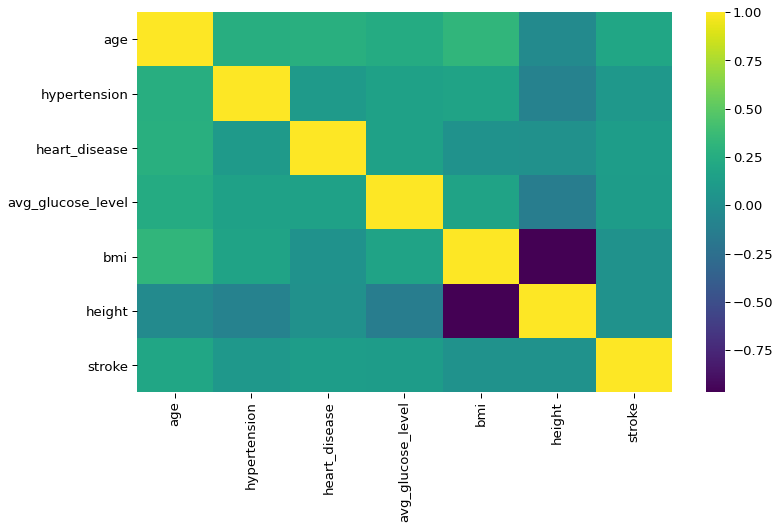

In [12]:
plt.figure(figsize=(12,7))
sns.set_context("paper", font_scale=1.5)
sns.heatmap(df.corr(), cmap="viridis")

<AxesSubplot:xlabel='avg_glucose_level'>

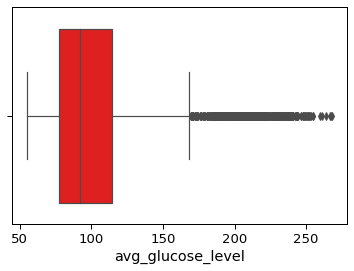

In [13]:
sns.boxplot(x='avg_glucose_level',data=df, color='Red')

<AxesSubplot:xlabel='bmi'>

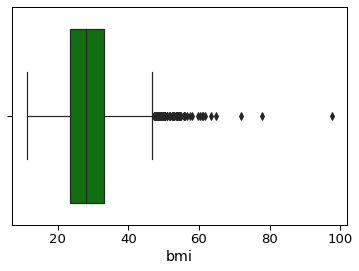

In [14]:
sns.boxplot(x='bmi',data=df, color = 'Green')

In [15]:
df.loc[df['bmi'] > 45]

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,blood,height,stroke
3,Female,31.0,0.0,0.0,No,Private,Urban,108.89,52.3,Unknown,O,1.24,0
34,Male,42.0,0.0,0.0,Yes,Private,Rural,210.48,71.9,never smoked,A,1.05,0
77,Female,61.0,1.0,0.0,Yes,Private,Rural,170.05,60.2,smokes,AB,1.15,0
99,Other,52.0,0.0,0.0,Yes,Private,Urban,82.24,54.7,formerly smoked,O,1.21,0
180,Female,56.0,0.0,0.0,Yes,Private,Rural,112.43,54.6,never smoked,A,1.21,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3705,Male,31.0,1.0,0.0,Yes,Private,Unknown,149.68,45.1,never smoked,A,1.33,0
3836,Female,57.0,0.0,0.0,Yes,Govt_job,Unknown,87.10,48.3,smokes,AB,1.29,0
3988,Female,52.0,0.0,NaN,Yes,Private,Rural,118.46,61.6,smokes,O,1.14,0
3997,Other,57.0,1.0,0.0,Yes,Private,Rural,129.54,60.9,smokes,AB,1.15,0


<AxesSubplot:xlabel='age'>

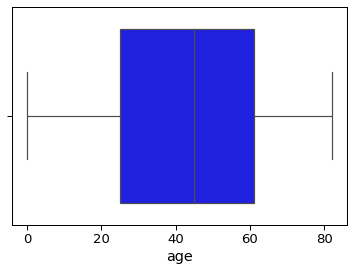

In [16]:
sns.boxplot(x='age',data=df , color = 'Blue')

In [17]:
df.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'blood', 'height', 'stroke'],
      dtype='object')

In [18]:
# unknown_feature = ['gender', 'hypertension', 'heart_disease', 'Residence_type', 'smoking_status','ever_married', 'blood', 'work_type', 'stroke']
unknown_feature = df.columns
print('Value counts: \n')
for i in unknown_feature:
    print(df[i].value_counts())
    print('\n')

Value counts: 

Female    2218
Male      1625
Other      157
Name: gender, dtype: int64


52.00    78
57.00    71
53.00    70
50.00    69
78.00    69
         ..
0.48      2
0.72      2
0.08      2
1.16      2
0.40      1
Name: age, Length: 104, dtype: int64


0.0    3402
1.0     368
Name: hypertension, dtype: int64


0.0    3694
1.0     216
Name: heart_disease, dtype: int64


Yes    2626
No     1374
Name: ever_married, dtype: int64


Private          2305
Self-employed     631
children          539
Govt_job          508
Never_worked       17
Name: work_type, dtype: int64


Unknown    1987
Urban      1018
Rural       995
Name: Residence_type, dtype: int64


91.85     5
93.88     5
79.89     4
114.32    4
93.55     4
         ..
68.38     1
89.83     1
147.50    1
198.33    1
60.50     1
Name: avg_glucose_level, Length: 3179, dtype: int64


27.6    25
27.0    24
27.7    24
28.7    23
26.9    23
        ..
55.0     1
40.0     1
36.5     1
44.6     1
54.0     1
Name: bmi, Length: 381, dty

In [19]:
print('Value percent: ')
for i in unknown_feature:
    print(df[i].value_counts(normalize=True)*100)
    print('\n')

Value percent: 
Female    55.450
Male      40.625
Other      3.925
Name: gender, dtype: float64


52.00    2.003596
57.00    1.823786
53.00    1.798099
50.00    1.772412
78.00    1.772412
           ...   
0.48     0.051374
0.72     0.051374
0.08     0.051374
1.16     0.051374
0.40     0.025687
Name: age, Length: 104, dtype: float64


0.0    90.238727
1.0     9.761273
Name: hypertension, dtype: float64


0.0    94.475703
1.0     5.524297
Name: heart_disease, dtype: float64


Yes    65.65
No     34.35
Name: ever_married, dtype: float64


Private          57.625
Self-employed    15.775
children         13.475
Govt_job         12.700
Never_worked      0.425
Name: work_type, dtype: float64


Unknown    49.675
Urban      25.450
Rural      24.875
Name: Residence_type, dtype: float64


91.85     0.130582
93.88     0.130582
79.89     0.104466
114.32    0.104466
93.55     0.104466
            ...   
68.38     0.026116
89.83     0.026116
147.50    0.026116
198.33    0.026116
60.50     0.026116
N

## Preprocessing Data

### fill 'age' and 'bmi' mean values

In [20]:
df['age'] = df['age'].fillna(np.mean(df['age']))
df

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,blood,height,stroke
0,Female,43.071256,0.0,0.0,No,children,Unknown,85.81,18.6,Unknown,O,NaN,0
1,Male,55.000000,0.0,0.0,Yes,Private,Urban,89.17,NaN,never smoked,B,1.59,0
2,Female,42.000000,0.0,0.0,No,Private,Unknown,98.53,18.5,never smoked,B,NaN,0
3,Female,31.000000,0.0,0.0,No,Private,Urban,108.89,52.3,Unknown,O,1.24,0
4,Female,38.000000,0.0,0.0,Yes,Private,Unknown,91.44,NaN,Unknown,O,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,Male,16.000000,0.0,0.0,No,Private,Unknown,99.49,22.0,Unknown,B,NaN,0
3996,Male,47.000000,0.0,0.0,Yes,Private,Rural,75.30,25.0,formerly smoked,B,1.79,0
3997,Other,57.000000,1.0,0.0,Yes,Private,Rural,129.54,60.9,smokes,AB,1.15,0
3998,Female,45.000000,0.0,0.0,Yes,Private,Unknown,172.33,45.3,formerly smoked,O,1.33,0


In [21]:
labels = [1,2,3,4,5]
df["age_bin"] = pd.cut(df["age"], 5, labels=labels)
df['age_bin'].value_counts()

3    1001
4     976
2     711
5     707
1     605
Name: age_bin, dtype: int64

In [22]:
gb_bmi = df.groupby("age_bin")["bmi"].mean()
gb_bmi

age_bin
1    20.715509
2    28.814368
3    31.020136
4    31.480000
5    29.288200
Name: bmi, dtype: float64

In [23]:
def impute_bmi(cols):
    bmi = cols[0]
    age_bin = cols[1]
    
    if pd.isnull(bmi):
        if age_bin == 1:
            return 20.715509
        elif age_bin == 2:
            return 28.814368
        elif age_bin == 3:
            return 31.020136
        elif age_bin == 4:
            return 31.480000
        elif age_bin == 5:
            return 29.288200
    else:
        return bmi

In [24]:
df["bmi"] = df[["bmi","age_bin"]].apply(impute_bmi, axis=1)
df['bmi']

0       18.600000
1       31.480000
2       18.500000
3       52.300000
4       31.020136
          ...    
3995    22.000000
3996    25.000000
3997    60.900000
3998    45.300000
3999    30.300000
Name: bmi, Length: 4000, dtype: float64

In [25]:
draw_missing_data_table(df)

,Total,Percent
height,1072,0.26800
hypertension,230,0.05750
avg_glucose_level,171,0.04275
heart_disease,90,0.02250
blood,10,0.00250
gender,0,0.00000
age,0,0.00000
ever_married,0,0.00000
work_type,0,0.00000
Residence_type,0,0.00000


In [26]:
df.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,height,stroke
count,4000.000000,3770.000000,3910.000000,3829.000000,4000.000000,2928.000000,4000.000000
mean,43.071256,0.097613,0.055243,106.178062,28.875573,1.611831,0.032500
std,22.123887,0.296830,0.228483,45.048667,6.979478,0.149053,0.177346
min,0.080000,0.000000,0.000000,55.220000,11.300000,0.910000,0.000000
25%,26.000000,0.000000,0.000000,77.500000,24.200000,1.520000,0.000000
50%,44.000000,0.000000,0.000000,92.110000,29.200000,1.630000,0.000000
75%,60.000000,0.000000,0.000000,114.090000,31.480000,1.722500,0.000000
max,82.000000,1.000000,1.000000,267.760000,97.600000,1.850000,1.000000


Xoá dữ liệu có `bmi` <= 45

In [27]:
df = df.loc[df['bmi'] < 45]
df

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,blood,height,stroke,age_bin
0,Female,43.071256,0.0,0.0,No,children,Unknown,85.81,18.600000,Unknown,O,NaN,0,3
1,Male,55.000000,0.0,0.0,Yes,Private,Urban,89.17,31.480000,never smoked,B,1.59,0,4
2,Female,42.000000,0.0,0.0,No,Private,Unknown,98.53,18.500000,never smoked,B,NaN,0,3
4,Female,38.000000,0.0,0.0,Yes,Private,Unknown,91.44,31.020136,Unknown,O,NaN,0,3
5,Female,24.000000,0.0,0.0,No,Private,Urban,97.55,26.200000,never smoked,B,1.75,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3993,Female,59.000000,0.0,0.0,Yes,Private,Unknown,65.98,31.480000,Unknown,O,1.60,0,4
3994,Female,52.000000,0.0,0.0,Yes,Private,Unknown,69.30,31.480000,never smoked,B,NaN,0,4
3995,Male,16.000000,0.0,0.0,No,Private,Unknown,99.49,22.000000,Unknown,B,NaN,0,1
3996,Male,47.000000,0.0,0.0,Yes,Private,Rural,75.30,25.000000,formerly smoked,B,1.79,0,3


In [28]:
draw_missing_data_table(df)

,Total,Percent
height,1072,0.274239
hypertension,221,0.056536
avg_glucose_level,166,0.042466
heart_disease,88,0.022512
blood,8,0.002047
gender,0,0.000000
age,0,0.000000
ever_married,0,0.000000
work_type,0,0.000000
Residence_type,0,0.000000


## Drop height

In [29]:
df.drop(columns=['height'], inplace=True)

/mnt/A0320C7B320C58A4/Code/Python/Stroke-prediction/Stroke_Env/lib/python3.8/site-packages/pandas/core/frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [30]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,blood,stroke,age_bin
0,Female,43.071256,0.0,0.0,No,children,Unknown,85.81,18.600000,Unknown,O,0,3
1,Male,55.000000,0.0,0.0,Yes,Private,Urban,89.17,31.480000,never smoked,B,0,4
2,Female,42.000000,0.0,0.0,No,Private,Unknown,98.53,18.500000,never smoked,B,0,3
4,Female,38.000000,0.0,0.0,Yes,Private,Unknown,91.44,31.020136,Unknown,O,0,3
5,Female,24.000000,0.0,0.0,No,Private,Urban,97.55,26.200000,never smoked,B,0,2


In [31]:
draw_missing_data_table(df)

,Total,Percent
hypertension,221,0.056536
avg_glucose_level,166,0.042466
heart_disease,88,0.022512
blood,8,0.002047
gender,0,0.000000
age,0,0.000000
ever_married,0,0.000000
work_type,0,0.000000
Residence_type,0,0.000000
bmi,0,0.000000


## Check correlation for avg_glucose_level

In [32]:
df.corr()['avg_glucose_level'].sort_values(ascending=False)

avg_glucose_level    1.000000
age                  0.228313
heart_disease        0.166880
hypertension         0.154387
bmi                  0.147862
stroke               0.102934
Name: avg_glucose_level, dtype: float64

### Hmm, this isn't really that much correlation so mean all time

In [33]:
df['avg_glucose_level'] = df['avg_glucose_level'].fillna(np.mean(df['avg_glucose_level']))

<ipython-input-33-b004468c9408>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['avg_glucose_level'] = df['avg_glucose_level'].fillna(np.mean(df['avg_glucose_level']))


In [34]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,blood,stroke,age_bin
0,Female,43.071256,0.0,0.0,No,children,Unknown,85.81,18.600000,Unknown,O,0,3
1,Male,55.000000,0.0,0.0,Yes,Private,Urban,89.17,31.480000,never smoked,B,0,4
2,Female,42.000000,0.0,0.0,No,Private,Unknown,98.53,18.500000,never smoked,B,0,3
4,Female,38.000000,0.0,0.0,Yes,Private,Unknown,91.44,31.020136,Unknown,O,0,3
5,Female,24.000000,0.0,0.0,No,Private,Urban,97.55,26.200000,never smoked,B,0,2


In [35]:
draw_missing_data_table(df)

,Total,Percent
hypertension,221,0.056536
heart_disease,88,0.022512
blood,8,0.002047
gender,0,0.000000
age,0,0.000000
ever_married,0,0.000000
work_type,0,0.000000
Residence_type,0,0.000000
avg_glucose_level,0,0.000000
bmi,0,0.000000


## Fill hypertension and blood with the one that has the most value count

In [36]:
df['hypertension'] = df['hypertension'].fillna(0.0)
df['hypertension'] = df['hypertension'].astype(int)
df.head()

<ipython-input-36-14d49c328501>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['hypertension'] = df['hypertension'].fillna(0.0)
<ipython-input-36-14d49c328501>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['hypertension'] = df['hypertension'].astype(int)


,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,blood,stroke,age_bin
0,Female,43.071256,0,0.0,No,children,Unknown,85.81,18.600000,Unknown,O,0,3
1,Male,55.000000,0,0.0,Yes,Private,Urban,89.17,31.480000,never smoked,B,0,4
2,Female,42.000000,0,0.0,No,Private,Unknown,98.53,18.500000,never smoked,B,0,3
4,Female,38.000000,0,0.0,Yes,Private,Unknown,91.44,31.020136,Unknown,O,0,3
5,Female,24.000000,0,0.0,No,Private,Urban,97.55,26.200000,never smoked,B,0,2


In [37]:
draw_missing_data_table(df)

,Total,Percent
heart_disease,88,0.022512
blood,8,0.002047
gender,0,0.000000
age,0,0.000000
hypertension,0,0.000000
ever_married,0,0.000000
work_type,0,0.000000
Residence_type,0,0.000000
avg_glucose_level,0,0.000000
bmi,0,0.000000


In [38]:
df['heart_disease'] = df['heart_disease'].fillna(0.0)
df['heart_disease'] = df['heart_disease'].astype(int)
df.head()

<ipython-input-38-4663f1d1a9e6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['heart_disease'] = df['heart_disease'].fillna(0.0)
<ipython-input-38-4663f1d1a9e6>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['heart_disease'] = df['heart_disease'].astype(int)


,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,blood,stroke,age_bin
0,Female,43.071256,0,0,No,children,Unknown,85.81,18.600000,Unknown,O,0,3
1,Male,55.000000,0,0,Yes,Private,Urban,89.17,31.480000,never smoked,B,0,4
2,Female,42.000000,0,0,No,Private,Unknown,98.53,18.500000,never smoked,B,0,3
4,Female,38.000000,0,0,Yes,Private,Unknown,91.44,31.020136,Unknown,O,0,3
5,Female,24.000000,0,0,No,Private,Urban,97.55,26.200000,never smoked,B,0,2


In [39]:
draw_missing_data_table(df)

,Total,Percent
blood,8,0.002047
gender,0,0.000000
age,0,0.000000
hypertension,0,0.000000
heart_disease,0,0.000000
ever_married,0,0.000000
work_type,0,0.000000
Residence_type,0,0.000000
avg_glucose_level,0,0.000000
bmi,0,0.000000


<AxesSubplot:xlabel='blood', ylabel='count'>

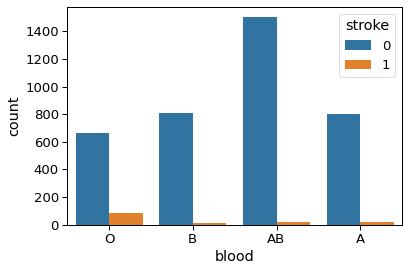

In [40]:
sns.countplot(x=df['blood'], hue=df['stroke'])

In [41]:
df['blood'] = df['blood'].fillna('AB')

<ipython-input-41-7d50f712a858>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['blood'] = df['blood'].fillna('AB')


In [42]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,blood,stroke,age_bin
0,Female,43.071256,0,0,No,children,Unknown,85.81,18.600000,Unknown,O,0,3
1,Male,55.000000,0,0,Yes,Private,Urban,89.17,31.480000,never smoked,B,0,4
2,Female,42.000000,0,0,No,Private,Unknown,98.53,18.500000,never smoked,B,0,3
4,Female,38.000000,0,0,Yes,Private,Unknown,91.44,31.020136,Unknown,O,0,3
5,Female,24.000000,0,0,No,Private,Urban,97.55,26.200000,never smoked,B,0,2


In [43]:
df['Residence_type'].unique()
df.loc[df['Residence_type']=='Unknown']

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,blood,stroke,age_bin
0,Female,43.071256,0,0,No,children,Unknown,85.81,18.600000,Unknown,O,0,3
2,Female,42.000000,0,0,No,Private,Unknown,98.53,18.500000,never smoked,B,0,3
4,Female,38.000000,0,0,Yes,Private,Unknown,91.44,31.020136,Unknown,O,0,3
6,Female,80.000000,0,0,Yes,Govt_job,Unknown,84.86,29.288200,Unknown,AB,0,5
7,Female,33.000000,0,0,Yes,Private,Unknown,86.97,31.020136,never smoked,A,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3990,Female,82.000000,0,0,Yes,Self-employed,Unknown,243.59,24.300000,never smoked,B,0,5
3992,Male,46.000000,0,0,Yes,Private,Unknown,59.05,31.020136,formerly smoked,B,0,3
3993,Female,59.000000,0,0,Yes,Private,Unknown,65.98,31.480000,Unknown,O,0,4
3994,Female,52.000000,0,0,Yes,Private,Unknown,69.30,31.480000,never smoked,B,0,4


- We will convert ever_married to 0 and 1
- We will one-hot-encode work_type, avg_glucose_level, blood
- We will drop Residence_type
- smoking_status????

In [44]:
df.drop(columns='age_bin', inplace=True)

/mnt/A0320C7B320C58A4/Code/Python/Stroke-prediction/Stroke_Env/lib/python3.8/site-packages/pandas/core/frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [45]:
df

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,blood,stroke
0,Female,43.071256,0,0,No,children,Unknown,85.81,18.600000,Unknown,O,0
1,Male,55.000000,0,0,Yes,Private,Urban,89.17,31.480000,never smoked,B,0
2,Female,42.000000,0,0,No,Private,Unknown,98.53,18.500000,never smoked,B,0
4,Female,38.000000,0,0,Yes,Private,Unknown,91.44,31.020136,Unknown,O,0
5,Female,24.000000,0,0,No,Private,Urban,97.55,26.200000,never smoked,B,0
...,...,...,...,...,...,...,...,...,...,...,...,...
3993,Female,59.000000,0,0,Yes,Private,Unknown,65.98,31.480000,Unknown,O,0
3994,Female,52.000000,0,0,Yes,Private,Unknown,69.30,31.480000,never smoked,B,0
3995,Male,16.000000,0,0,No,Private,Unknown,99.49,22.000000,Unknown,B,0
3996,Male,47.000000,0,0,Yes,Private,Rural,75.30,25.000000,formerly smoked,B,0


In [46]:
for i in df.columns:
    print(str(i) + '= ' + str(df[i].unique()))

gender= ['Female' 'Male' 'Other']
age= [4.30712561e+01 5.50000000e+01 4.20000000e+01 3.80000000e+01
 2.40000000e+01 8.00000000e+01 3.30000000e+01 8.00000000e+00
 2.00000000e+01 4.30000000e+01 2.30000000e+01 5.90000000e+01
 3.10000000e+01 7.90000000e+01 4.10000000e+01 4.50000000e+01
 1.60000000e+01 6.50000000e+01 5.80000000e+01 4.40000000e+01
 7.80000000e+01 4.90000000e+01 4.80000000e+01 3.70000000e+01
 4.60000000e+01 2.80000000e+01 1.20000000e+01 3.00000000e+00
 5.40000000e+01 1.30000000e+01 1.40000000e+01 6.90000000e+01
 5.20000000e+01 8.20000000e+01 1.00000000e+01 7.30000000e+01
 3.90000000e+01 8.00000000e-01 7.40000000e+01 3.20000000e+01
 6.00000000e+01 7.00000000e+00 1.80000000e+01 7.00000000e+01
 6.10000000e+01 1.50000000e+01 6.20000000e+01 1.88000000e+00
 1.70000000e+01 3.50000000e+01 6.80000000e+01 2.90000000e+01
 7.70000000e+01 6.40000000e+01 3.00000000e+01 6.30000000e+01
 4.00000000e+01 4.70000000e+01 7.50000000e+01 6.70000000e+01
 2.50000000e+01 4.00000000e+00 5.00000000e+00 

In [47]:
marriage_mapping = {'No': 0, 'Yes': 1}
df['ever_married'] = df['ever_married'].map(marriage_mapping)

<ipython-input-47-fd4effd14e13>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['ever_married'] = df['ever_married'].map(marriage_mapping)


In [48]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,blood,stroke
0,Female,43.071256,0,0,0,children,Unknown,85.81,18.600000,Unknown,O,0
1,Male,55.000000,0,0,1,Private,Urban,89.17,31.480000,never smoked,B,0
2,Female,42.000000,0,0,0,Private,Unknown,98.53,18.500000,never smoked,B,0
4,Female,38.000000,0,0,1,Private,Unknown,91.44,31.020136,Unknown,O,0
5,Female,24.000000,0,0,0,Private,Urban,97.55,26.200000,never smoked,B,0


In [49]:
oh = OneHotEncoder()

In [50]:
categorical_features_oh = ['gender', 'blood', 'smoking_status', 'Residence_type', 'work_type']

In [51]:
for i in categorical_features_oh:
    df[i] = pd.Categorical(df[i])
    dfDummies = pd.get_dummies(df[i], prefix= i)
    df = pd.concat([df, dfDummies], axis=1)
df

<ipython-input-51-d97b40af56c7>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[i] = pd.Categorical(df[i])


,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,...,smoking_status_never smoked,smoking_status_smokes,Residence_type_Rural,Residence_type_Unknown,Residence_type_Urban,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children
0,Female,43.071256,0,0,0,children,Unknown,85.81,18.600000,Unknown,...,0,0,0,1,0,0,0,0,0,1
1,Male,55.000000,0,0,1,Private,Urban,89.17,31.480000,never smoked,...,1,0,0,0,1,0,0,1,0,0
2,Female,42.000000,0,0,0,Private,Unknown,98.53,18.500000,never smoked,...,1,0,0,1,0,0,0,1,0,0
4,Female,38.000000,0,0,1,Private,Unknown,91.44,31.020136,Unknown,...,0,0,0,1,0,0,0,1,0,0
5,Female,24.000000,0,0,0,Private,Urban,97.55,26.200000,never smoked,...,1,0,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3993,Female,59.000000,0,0,1,Private,Unknown,65.98,31.480000,Unknown,...,0,0,0,1,0,0,0,1,0,0
3994,Female,52.000000,0,0,1,Private,Unknown,69.30,31.480000,never smoked,...,1,0,0,1,0,0,0,1,0,0
3995,Male,16.000000,0,0,0,Private,Unknown,99.49,22.000000,Unknown,...,0,0,0,1,0,0,0,1,0,0
3996,Male,47.000000,0,0,1,Private,Rural,75.30,25.000000,formerly smoked,...,0,0,1,0,0,0,0,1,0,0


In [52]:
for i in categorical_features_oh:
    df.drop(columns=i, axis=1, inplace=True)
df

,age,hypertension,heart_disease,ever_married,avg_glucose_level,bmi,stroke,gender_Female,gender_Male,gender_Other,...,smoking_status_never smoked,smoking_status_smokes,Residence_type_Rural,Residence_type_Unknown,Residence_type_Urban,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children
0,43.071256,0,0,0,85.81,18.600000,0,1,0,0,...,0,0,0,1,0,0,0,0,0,1
1,55.000000,0,0,1,89.17,31.480000,0,0,1,0,...,1,0,0,0,1,0,0,1,0,0
2,42.000000,0,0,0,98.53,18.500000,0,1,0,0,...,1,0,0,1,0,0,0,1,0,0
4,38.000000,0,0,1,91.44,31.020136,0,1,0,0,...,0,0,0,1,0,0,0,1,0,0
5,24.000000,0,0,0,97.55,26.200000,0,1,0,0,...,1,0,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3993,59.000000,0,0,1,65.98,31.480000,0,1,0,0,...,0,0,0,1,0,0,0,1,0,0
3994,52.000000,0,0,1,69.30,31.480000,0,1,0,0,...,1,0,0,1,0,0,0,1,0,0
3995,16.000000,0,0,0,99.49,22.000000,0,0,1,0,...,0,0,0,1,0,0,0,1,0,0
3996,47.000000,0,0,1,75.30,25.000000,0,0,1,0,...,0,0,1,0,0,0,0,1,0,0


In [53]:
draw_missing_data_table(df)

,Total,Percent
age,0,0.0
hypertension,0,0.0
work_type_Self-employed,0,0.0
work_type_Private,0,0.0
work_type_Never_worked,0,0.0
work_type_Govt_job,0,0.0
Residence_type_Urban,0,0.0
Residence_type_Unknown,0,0.0
Residence_type_Rural,0,0.0
smoking_status_smokes,0,0.0


In [54]:
from sklearn.preprocessing import StandardScaler
std = StandardScaler()
columns = ['avg_glucose_level','bmi','age']
scaled = std.fit_transform(df[columns])
scaled = pd.DataFrame(scaled,columns=columns)
df=df.drop(columns=columns,axis=1)

In [55]:
df = df.reset_index(drop=True)
df = df.merge(scaled, left_index=True, right_index=True, how = "left")
df

,hypertension,heart_disease,ever_married,stroke,gender_Female,gender_Male,gender_Other,blood_A,blood_AB,blood_B,...,Residence_type_Unknown,Residence_type_Urban,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,avg_glucose_level,bmi,age
0,0,0,0,0,1,0,0,0,0,0,...,1,0,0,0,0,0,1,-0.454391,-1.632301,0.000364
1,0,0,1,0,0,1,0,0,0,1,...,0,1,0,0,1,0,0,-0.377299,0.528038,0.535819
2,0,0,0,0,1,0,0,0,0,1,...,1,0,0,0,1,0,0,-0.162540,-1.649074,-0.047722
3,0,0,1,0,1,0,0,0,0,0,...,1,0,0,0,1,0,0,-0.325215,0.450906,-0.227273
4,0,0,0,0,1,0,0,0,0,1,...,0,1,0,0,1,0,0,-0.185025,-0.357567,-0.855701
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3904,0,0,1,0,1,0,0,0,0,0,...,1,0,0,0,1,0,0,-0.909377,0.528038,0.715369
3905,0,0,1,0,1,0,0,0,0,1,...,1,0,0,0,1,0,0,-0.833202,0.528038,0.401155
3906,0,0,0,0,0,1,0,0,0,1,...,1,0,0,0,1,0,0,-0.140513,-1.062025,-1.214803
3907,0,0,1,0,0,1,0,0,0,1,...,0,0,0,0,1,0,0,-0.695536,-0.558841,0.176717


In [56]:
draw_missing_data_table(df)

,Total,Percent
hypertension,0,0.0
heart_disease,0,0.0
bmi,0,0.0
avg_glucose_level,0,0.0
work_type_children,0,0.0
work_type_Self-employed,0,0.0
work_type_Private,0,0.0
work_type_Never_worked,0,0.0
work_type_Govt_job,0,0.0
Residence_type_Urban,0,0.0


In [57]:
x = df.copy()
x = x.drop(columns='stroke')
y = df['stroke']

In [58]:
x[0:5]

,hypertension,heart_disease,ever_married,gender_Female,gender_Male,gender_Other,blood_A,blood_AB,blood_B,blood_O,...,Residence_type_Unknown,Residence_type_Urban,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,avg_glucose_level,bmi,age
0,0,0,0,1,0,0,0,0,0,1,...,1,0,0,0,0,0,1,-0.454391,-1.632301,0.000364
1,0,0,1,0,1,0,0,0,1,0,...,0,1,0,0,1,0,0,-0.377299,0.528038,0.535819
2,0,0,0,1,0,0,0,0,1,0,...,1,0,0,0,1,0,0,-0.162540,-1.649074,-0.047722
3,0,0,1,1,0,0,0,0,0,1,...,1,0,0,0,1,0,0,-0.325215,0.450906,-0.227273
4,0,0,0,1,0,0,0,0,1,0,...,0,1,0,0,1,0,0,-0.185025,-0.357567,-0.855701


In [57]:
y[0:5]

0    0
1    0
2    0
3    0
4    0
Name: stroke, dtype: int64

## TREATING IMBALANCE CLASS USING SMOTE

In [59]:
smote = SMOTE()
x_smote, y_smote = smote.fit_resample(x, y)

In [60]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.2, random_state= 42)

In [61]:
print(len(x_train))
print(len(y_train))
print(len(x_test))
print(len(y_test))

3127
3127
782
782
